In [1]:
%matplotlib inline

In [2]:
import xarray as xr

# Formatting temperature data
- Reading in Temperature data
- Resampling temp data monthly
- Save monthly temp data as netcdf

In [3]:
data = xr.open_dataset('http://opendap.knmi.nl/knmi/thredds/dodsC/e-obs_0.25regular/tg_stderr_0.25deg_reg_v13.1.nc')

In [4]:
tg = data['tg']

In [5]:
%time monthly = tg.sel(time=slice('2009-01-01','2016-07-01')).resample('M', dim='time', how='mean')

Wall time: 1min 20s


In [6]:
tg.coords

Coordinates:
  * longitude  (longitude) float32 -40.375 -40.125 -39.875 -39.625 -39.375 ...
  * latitude   (latitude) float32 25.375 25.625 25.875 26.125 26.375 26.625 ...
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 1950-01-03 ...

In [9]:
uk = tg.sel(longitude=slice(-10,3), latitude=slice(50,54))

In [10]:
%time uk_monthly = uk.sel(time=slice('2009-01-01','2016-07-01')).resample('M', dim='time', how='mean')

Wall time: 7.65 s


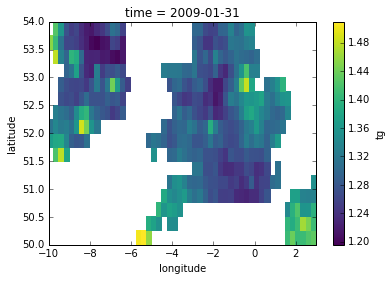

In [11]:
uk_monthly.isel(time=0).plot()

In [18]:
uk_ds = uk_monthly.to_dataset(name='data')

In [19]:
uk_ds.to_netcdf(r'D:\Annies_Dissertation\Analysis\weather\UK_Temperature.nc')

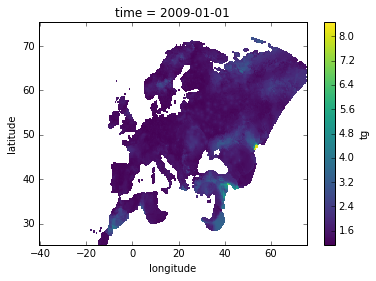

In [12]:
tg.sel(time='2009-01-01').plot()

# Rasterstats

In [20]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
from matplotlib.pyplot import *
from glob import glob
import os
import datetime

import pandas as pd

from rasterio import features

from rasterio_to_xarray import rasterio_to_xarray, xarray_to_rasterio

import rasterstats
import fiona

from tqdm import tqdm

from shapely.geometry import shape
from rasterstats.io import read_features


In [21]:
data = xr.open_mfdataset(r'D:\Annies_Dissertation\Analysis\weather\UK_Temperature.nc')['data']

In [22]:
# Subsetting params
x_start = 950
x_end = None

y_start = 950
y_stop = None

In [23]:
subset = data.isel(x=slice(x_start, y_stop), y=slice(y_start, y_stop))

ValueError: dimensions ['x', 'y'] do not exist